# GERD weather forecast

**Introduction**


**The Grand Ethiopian Renaissance Dam (GERD)**, is a gravity dam on the Blue Nile River in Ethiopia under construction since 2011. The dam is in the Benishangul-Gumuz Region of Ethiopia, about 45 km (28 mi) east of the border with Sudan.

The primary purpose of the dam is electricity production to relieve Ethiopia's acute energy shortage and for electricity export to neighbouring countries. With a planned installed capacity of 6 gigawatts, the dam will be the largest hydroelectric power plant in Africa when completed,as well as among the 20 largest in the world with planned maximum storage capacity of 74 billion cubic meters of water.
<center>
    <img src = images/dam_1.jpeg width = 50%/>
</center>

**OVERVIEW**

In this Capstone project,I will explore an environmental weather dataset from ***World Weather for Water Data Service (W3S)*** , a repository of University of Guelph.  

# 1 -  Business Understanding / Research Question

###### 1.1 - The research question

Forecast temperature and precipitation on river water sheds that can feed to the GERD dam, and prepare for plan accordingly.

Temperature affects the rate of evaporation from the water surface and transpiration from vegetation along the river. As the temperature increases, so does the rate of evaporation and transpiration, leading to a decrease in the amount of water in the rivers basins of GERD. Which can result in reduced water levels in the dam there by electric generation. 

Precipitation, on the other hand, directly affects the amount of water in the rivers. Increased precipitation, such as heavy rainfall, can lead to higher water levels and potentially cause flooding and may overwhelm the dam's storage/release capacity. On the other hand, a lack of precipitation can lead to lower water levels and drought conditions.

In addition, changes in precipitation patterns and amounts can have a long-term impact on the water cycle and the overall health of the river watersheds and there by the dam and its energey generation. 

Overall, temperature and precipitation play important roles in determining the water levels and health of a river watersheds feeding the GERD dam, and changes in these factors can have far-reaching in energy generation and ripple effects in the over all socio-economic and situation of the region.

Predict/forecast, The average Temperature, Precipitation, * Hydrometric Data* , climate prediction for GERD. The final result comes with major forecasting in locations in the GERD Basin.

***Why this question is important***

The energy generating capacity of Hydroelectric station is directly affected by the amount of water in the reservoir dam, which is directly impacted by the weather/climate conditions of the surrounding area and the river basins feeding to the Dam. So, climate forecasting for this project will help for power budget planning, how much billion meter cube water to keep/release from the dam, estimate the energy production of the station, plan for best time to schedule for maintenance of the station, over all macro/micro economic planning of the region as its tied to energy.

**Optimal water management:** Hydroelectric dams require a steady flow of water to generate electricity. Accurate predictions of temperature and precipitation can help dam operators manage water resources more efficiently by allowing them to make informed decisions about when to store water, release it, or generate electricity. This helps to maximize the efficiency of the GERD dam and reduce the risk of water shortages.

**Flood control:** Precipitation predictions can be used to anticipate and mitigate the effects of floods. By monitoring weather patterns and forecasting rainfall, GERD dam operators can adjust water release schedules to prevent the dam from being overwhelmed by excess water. This helps to prevent flooding downstream and reduce the risk of property damage and loss of life.

**Environmental management:** Temperature and precipitation predictions can help dam operators manage the environmental impacts of their operations. For example, accurate temperature predictions can help operators control water temperatures to maintain healthy aquatic ecosystems. Similarly, precipitation predictions can help operators manage water quality by adjusting water release schedules to prevent sedimentation and erosion.

**Financial planning:** Predicting temperature and precipitation can also help dam operators plan for future energy demand/shortage and price fluctuations. By forecasting weather patterns and water availability, GERD operators can adjust their operations and pricing strategies to maximize revenue and reduce costs


###### 1.2 - Data Source

World Weather for Water Data Service (W3S) from a repository of University of Guelph, is a Data as a Service (DaaS) platform that allows me to download climate (precipitation, maximum temperature & minimum temperature) data for the predefined watershed along the GERD basin to develop data-driven rainfall-runoff models. I got data from 2000 and 2019 from this platform.

University of Guelph https://www.uoguelph.ca/watershed/w3s/
Data collected to GERD basin area, shown in the figure below, the red dot is the location of the GERD (Dam).


Data Source : University of Guelph https://www.uoguelph.ca/watershed/w3s/

Downloaded into multiple CSVs https://drive.google.com/drive/folders/1a1h0ZZYdGmd9dJb9ecaDezkhdN1wLvJC

<center>
    <img src = images/water_shed.png width = 50%/>
</center>

###### 1.3 - Techniques used in analysis

- This a timeseries: Data prep, Data analysis and visualizations (trend/seasonality), testing stationarity, Data transformation, review SARIMA with ACF and PACF to forecast/predict the time series,( predict the average temp and precipitation of GERD basin), some of the well known timeseris models are:

1. ARIMA (AutoRegressive Integrated Moving Average): ARIMA is a classic time series forecasting method that models the underlying structure in the data and uses this information to make predictions. It is well-suited for weather forecasting because it can capture both short-term and long-term patterns in the data.

2. SARIMA (Seasonal ARIMA): SARIMA is a variation of ARIMA that includes a seasonal component in the model. This makes it well-suited for **weather forecasting**, where there are clear seasonal patterns in the data, such as the onset and cessation of rainy seasons.

3. LSTM (Long Short-Term Memory) in AI/ML. LSTM is a type of recurrent neural network (RNN) that is designed to overcome the problem of vanishing gradients, which occurs in traditional RNNs when they try to propagate error gradients back through many time steps.

The goal is to predict future weather conditions on the GERD basin based on past observations. Using some of the popular time series forecasting models for weather forecasting 

###### 1.4 - Expected results

With the data we have and leasson learned in the course we would expect a better prediction of temperature and precipitation in the GERD basin. We couldn't find more data about Dew Point, Humidity, wind speed, visiblity, pressure which might help better imporve the quality of my model.

**Temperature Data**
- Daily Average Temperature
- Daily Max Temperature
- Daily Mean Temperature
- Annual Extereme Temperature

**Precipitation Data**
- Daily Precipitation
- Cumulative monthly precipitations
- Annual extreme precipitation


###### 1.5 -  Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import os, glob
from numpy import percentile
import itertools

#visualization
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


from functools import partial
import calendar
import datetime

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor, ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error, r2_score

#time series 
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore")

# 2 - Data Understanding

After considering the business understanding, we want to get familiar with our data and get to know the dataset and explore what information it contains and how this could be used to inform our business understanding.

Load the data and familiarize with it

- See the available columns and their data-types
- Some standard details like the min, max, std-dev of the numerical variables and possible values in the categorical variables
- What percentage of data has null values. Start thinking about how to deal with them. Is there a logical way of filling the null values?
- Are there unreasonable values in the numerical variables.
- Check the histograms and distributions to understand if scaling is needed
- The standard instrument for the measurement of rainfall is the 203mm (8 inch) rain gauge.

###### 2.1 - Import the dataset:

In [2]:
#use parse_date=True to make the dates column datetime type
df_temperature = pd.read_csv("data/temperature.csv", parse_dates=True, index_col='date')

In [3]:
df_temperature.shape

(2005371, 5)

In [4]:
df_precipitation = pd.read_csv("data/precipitation.csv",parse_dates=True, index_col='date')

In [5]:
df_precipitation.shape

(50051007, 4)

- Temperatture measured in **degress Celsius**
- Precipitaoin is measured in **millimeteres** based on the size of the rain guage.

In [6]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2005371 entries, 2001-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lat     float64
 1   long    float64
 2   elev    int64  
 3   tmin    float64
 4   tmax    float64
dtypes: float64(4), int64(1)
memory usage: 91.8 MB


In [7]:
df_temperature.head(5)

,lat,long,elev,tmin,tmax
date,,,,,
2001-01-01,8.25,32.75,405,18.2,36.1
2001-01-02,8.25,32.75,405,20.0,37.6
2001-01-03,8.25,32.75,405,23.4,33.1
2001-01-04,8.25,32.75,405,17.4,33.1
2001-01-05,8.25,32.75,405,13.9,32.6


In [8]:
df_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50051007 entries, 2001-01-01 to 2019-12-31
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lat     float64
 1   long    float64
 2   elev    int64  
 3   precip  float64
dtypes: float64(3), int64(1)
memory usage: 1.9 GB


In [9]:
df_precipitation.sample(5)

,lat,long,elev,precip
date,,,,
2007-06-03,6.45,39.45,1931,6.042615
2007-02-25,3.85,37.85,793,3.208761
2010-03-26,6.75,33.95,447,0.245658
2007-08-20,11.55,37.65,2069,0.810701
2015-07-20,7.35,37.65,2718,26.147131


In [10]:
df_precipitation.head(5)

,lat,long,elev,precip
date,,,,
2001-01-01,6.15,41.35,786,0.0
2001-01-02,6.15,41.35,786,0.0
2001-01-03,6.15,41.35,786,0.0
2001-01-04,6.15,41.35,786,0.0
2001-01-05,6.15,41.35,786,0.0


###### 2.2 - Check for missing values

In [11]:
temp_missing_values = df_temperature.isna().sum()
print(temp_missing_values)

precipitation_missing_values = df_precipitation.isna().sum()
print(precipitation_missing_values)

lat     0
long    0
elev    0
tmin    0
tmax    0
dtype: int64
lat       0
long      0
elev      0
precip    0
dtype: int64


No missing values on both datasets.

###### 2.3 - Data Cleaning

In [12]:
print("Duplicates in temperature dataset:{} ".format(df_temperature.duplicated().sum()))
print("Duplicates in precipitation dataset:{} ".format(df_precipitation.duplicated().sum()))

Duplicates in temperature dataset:605913 
Duplicates in precipitation dataset:25382543 


Drop the duplicates

In [13]:
df_temperature.drop_duplicates(inplace=True)

In [14]:
df_precipitation.drop_duplicates(inplace=True)

**Outliers**

In [15]:
#outliers
df_precipitation_test = df_precipitation.query('(precip > 1000)')
df_precipitation_test

,lat,long,elev,precip
date,,,,


In [16]:
df_precipitation[df_precipitation.index.year == 2001]['precip']

date
2001-01-01     0.000000
2001-01-25     0.168518
2001-03-26     0.000098
2001-03-29    12.231543
2001-04-01     1.235200
                ...    
2001-11-04     8.282775
2001-11-16     0.006492
2001-11-17     0.409580
2001-12-10     0.682689
2001-12-13     0.048087
Name: precip, Length: 1269108, dtype: float64

###### 2.4 - Data Summarization

2.4.1 - Temperature

In [17]:
temp_summary_stats = df_temperature.describe()
print(temp_summary_stats)

                lat          long          elev          tmin          tmax
count  1.399458e+06  1.399458e+06  1.399458e+06  1.399458e+06  1.399458e+06
mean   9.032644e+00  3.710407e+01  1.397811e+03  1.724062e+01  2.813995e+01
std    2.796948e+00  2.162934e+00  7.696254e+02  5.208960e+00  5.477076e+00
min    3.750000e+00  3.275000e+01  3.890000e+02 -7.740000e+01  2.700000e+00
25%    6.750000e+00  3.525000e+01  6.830000e+02  1.360000e+01  2.440000e+01
50%    8.750000e+00  3.725000e+01  1.302000e+03  1.730000e+01  2.800000e+01
75%    1.125000e+01  3.875000e+01  1.933000e+03  2.110000e+01  3.200000e+01
max    1.425000e+01  4.125000e+01  3.599000e+03  4.160000e+01  4.590000e+01


In [18]:
#function to calcuate Daily average
def daily_avg(x,y):
    return (x+y)/2

In [19]:
# df_temperature['daily_avg_temp'] = df_temperature.parallel_apply(lambda x: daily_avg(x.tmin,x.tmax), axis=1)
df_temperature['daily_avg_temp'] = df_temperature.apply(lambda x: daily_avg(x.tmin,x.tmax), axis=1)
df_temperature.sample(5)

,lat,long,elev,tmin,tmax,daily_avg_temp
date,,,,,,
2001-01-27,10.25,33.25,410,18.8,31.8,25.30
2007-03-04,8.75,39.75,1264,22.2,33.2,27.70
2005-11-09,9.25,40.25,816,26.5,31.3,28.90
2003-01-18,10.25,36.25,1547,16.1,28.6,22.35
2011-02-12,9.75,36.75,1427,11.7,28.1,19.90


Monthly mean, median, min and max temperature

In [20]:
summary_stats_temperature = df_temperature['daily_avg_temp'].resample('M').agg(['mean', 'median', 'min', 'max'])
summary_stats_temperature.sample(5)

,mean,median,min,max
date,,,,
2002-08-31,21.251486,21.125,8.45,33.70
2011-01-31,21.354788,21.500,8.45,33.15
2006-08-31,21.480627,21.300,9.55,31.90
2011-05-31,24.366028,23.650,8.15,39.00
2009-02-28,23.608976,23.650,10.60,38.90


2.4.2 - Precipitation

Monthly mean, median, min and max Precipitation

In [21]:
summary_stats_precipitation = df_precipitation['precip'].resample('M').agg(['mean', 'median', 'min', 'max'])
summary_stats_precipitation.sample(5)

,mean,median,min,max
date,,,,
2001-05-31,6.364700,2.839968,9.921856e-16,125.94323
2005-10-31,5.186708,1.856501,3.465917e-10,152.55573
2006-09-30,6.742145,3.109991,2.539170e-13,158.14308
2011-12-31,5.212583,1.198960,1.447254e-09,121.90067
2019-05-31,5.725880,2.434480,1.694813e-09,174.15059


###### 2.5 - Visualization

Location of the GERD basin

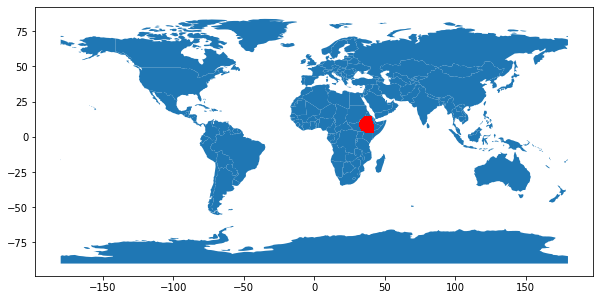

<Figure size 432x288 with 0 Axes>

In [156]:
geometry = [Point(xy) for xy in zip(df_temperature['long'], df_temperature['lat'])]
gdf = GeoDataFrame(df_temperature, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=15);
plt.show()
plt.savefig("./images/gerd_basin_map.jpg");

2.5.1 - Temperature

In [22]:
#temperature grouped by Year
temperature_grouped = df_temperature.groupby(df_temperature.index.year)

In [23]:
max_temp_values = temperature_grouped.max()
mean_temp_values = temperature_grouped.mean()
min_temp_values = temperature_grouped.min()

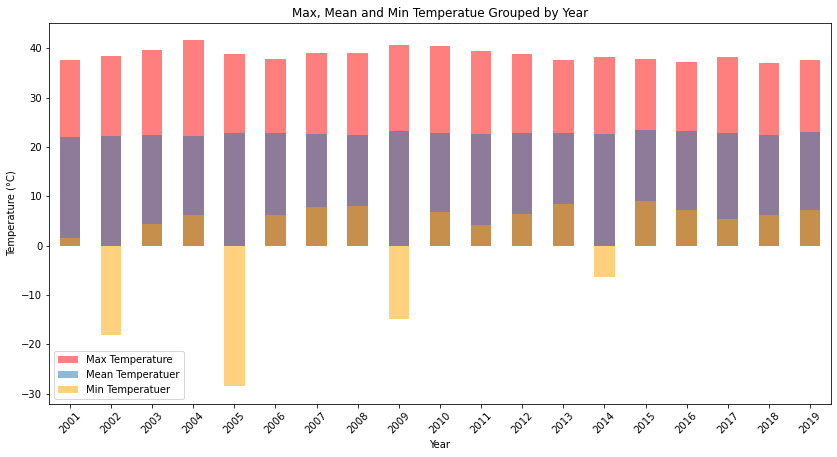

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
max_temp_values['daily_avg_temp'].plot.bar(color='red', alpha=0.5, label='Max Temperature')
mean_temp_values['daily_avg_temp'].plot.bar(alpha=0.5, label='Mean Temperatuer')
min_temp_values['daily_avg_temp'].plot.bar(color='orange',alpha=0.5, label='Min Temperatuer')

# Add a title and labels to the plot
plt.title('Max, Mean and Min Temperatue Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("./images/max_mean_min_temp_by_year.jpg");

2.5.2 - Precipitation

In [25]:
precipitation_grouped = df_precipitation.groupby(df_precipitation.index.year)

In [26]:
max_precip_values = precipitation_grouped['precip'].max()
mean_precip_values = precipitation_grouped['precip'].mean()
min_precip_values = precipitation_grouped['precip'].min()

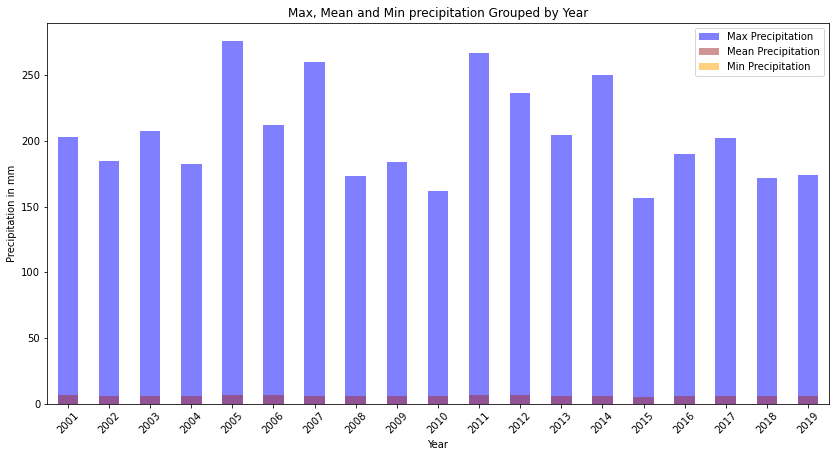

<Figure size 432x288 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))
max_precip_values.plot.bar(color='blue', alpha=0.5, label='Max Precipitation')
mean_precip_values.plot.bar(color='brown', alpha=0.5, label='Mean Precipitation')
min_precip_values.plot.bar(color='orange',alpha=0.5, label='Min Precipitation')

# Add a title and labels to the plot
plt.title('Max, Mean and Min precipitation Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Precipitation in mm')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("./images/max_mean_min_precip_by_year.jpg");

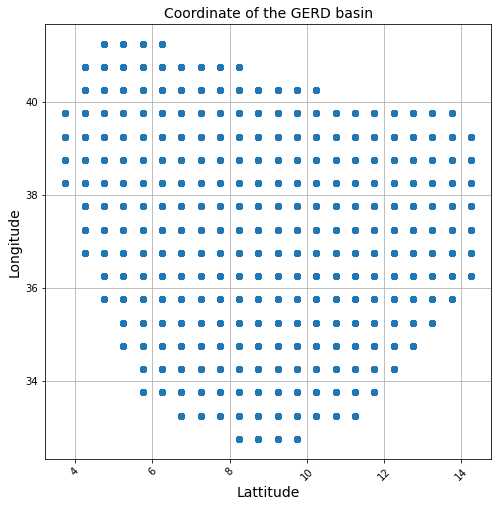

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(y=df_temperature['long'], x=df_temperature['lat'])
plt.title('Coordinate of the GERD basin',fontsize=14, loc = 'center')
plt.ylabel('Longitude',fontsize=14)
plt.xlabel('Lattitude',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()

Temperature plot with monthly mean and max

In [29]:
df_temperature_avg_monthly = df_temperature.resample('M').mean()

In [30]:
df_temperature_avg_monthly.head(5)

,lat,long,elev,tmin,tmax,daily_avg_temp
date,,,,,,
2001-01-31,8.876792,37.148409,1403.406026,13.685730,28.165547,20.925638
2001-02-28,8.888705,37.140483,1402.831109,15.198765,29.914544,22.556655
2001-03-31,8.891263,37.135964,1402.995265,17.699121,30.862864,24.280992
2001-04-30,8.882914,37.141512,1401.107613,18.294602,28.375399,23.335001
2001-05-31,8.894869,37.135734,1403.752008,18.481842,27.118837,22.800339


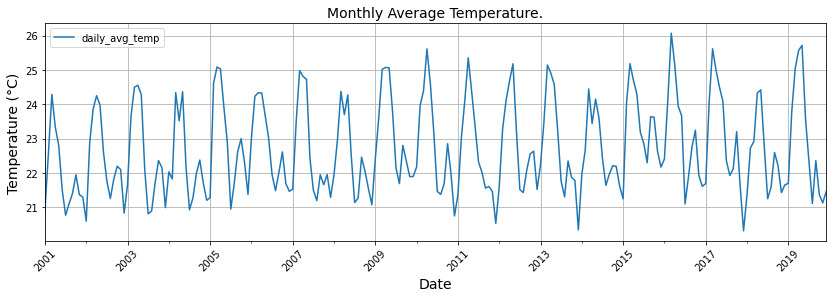

<Figure size 432x288 with 0 Axes>

In [31]:
df_temperature.resample('M').mean().plot(y='daily_avg_temp', kind='line',figsize=(14,4))
plt.title('Monthly Average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/mean_temp.jpg");

<Figure size 1440x288 with 0 Axes>

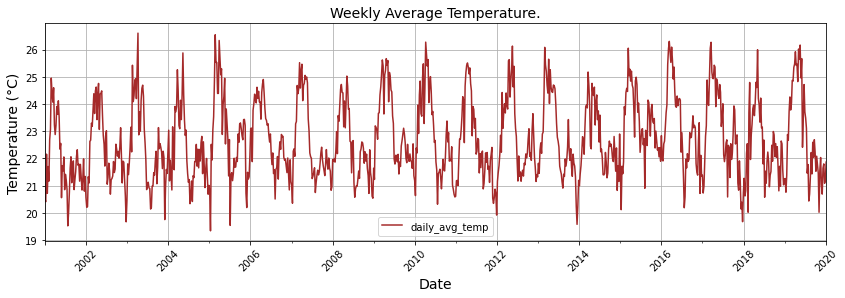

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(20,4))
df_temperature.resample('W').mean().plot(y='daily_avg_temp', kind='line',figsize=(14,4),c='brown')
plt.title('Weekly Average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/max_mean_temp.jpg");

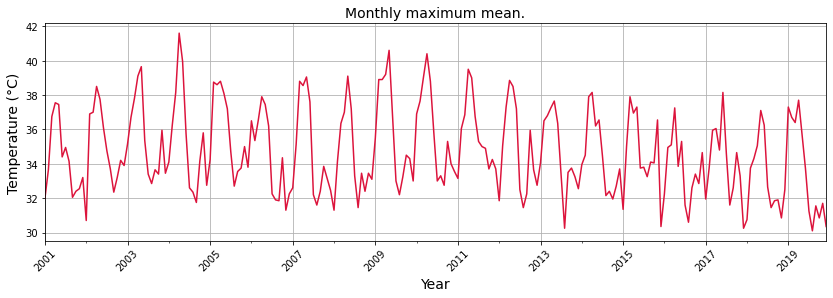

<Figure size 432x288 with 0 Axes>

In [33]:
df_temperature.resample('M').max()['daily_avg_temp'].plot(figsize=(14,4),c='crimson')
plt.title('Monthly maximum mean.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/max_temp.jpg");
# M = calendar month end
# D = one absolute day
# W = one week
# A = Year end frequency

Checking daily average temperature and precipitation in a specific time span.

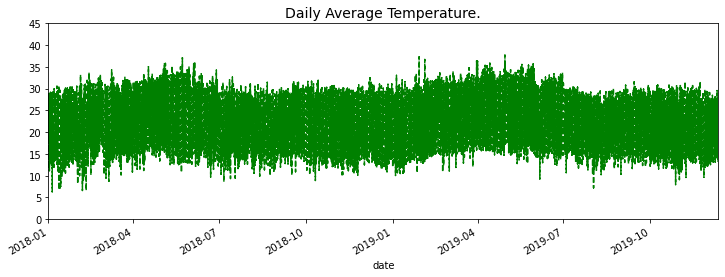

In [34]:
df_temperature['daily_avg_temp'].plot(xlim=['2018-01-01','2019-12-12'],ls='--', ylim=[0,45],kind='line', figsize=(12,4),c='green')
plt.title('Daily Average Temperature.',fontsize=14, loc = 'center')
plt.show()

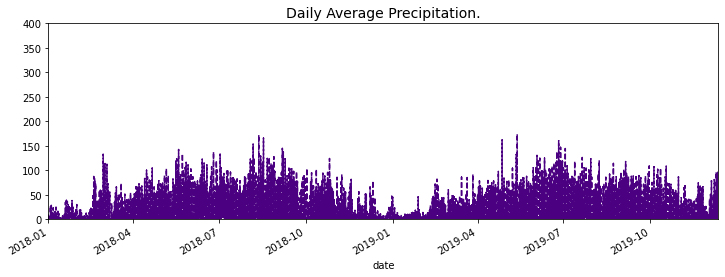

In [35]:
df_precipitation['precip'].plot(xlim=['2018-01-01','2019-12-12'],ls='--', ylim=[0,400],kind='line', figsize=(12,4),c='indigo')
plt.title('Daily Average Precipitation.',fontsize=14, loc = 'center')
plt.show()

Precipitation plot with weekly average and max.

<Figure size 1440x288 with 0 Axes>

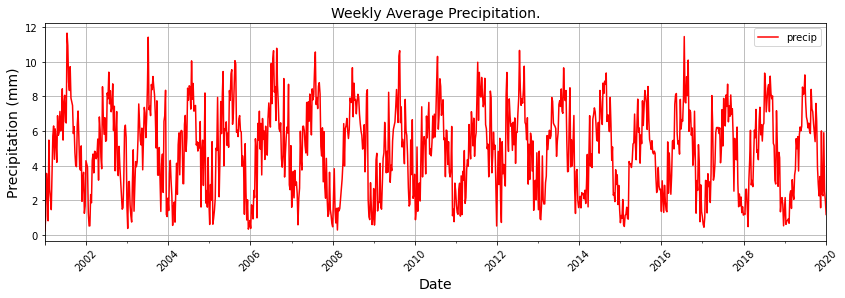

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(20,4))
df_precipitation.resample('W').mean().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Weekly Average Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/weekly_avg_precip.jpg");

Precipitation plot with monthly average and max

In [37]:
df_precipitation_avg_monthly = df_precipitation.resample('M').mean()

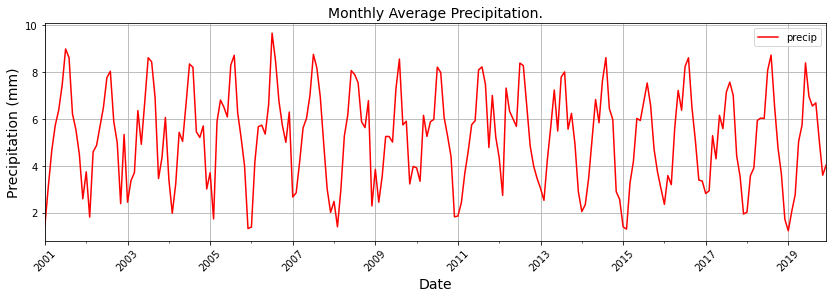

<Figure size 432x288 with 0 Axes>

In [38]:
df_precipitation.resample('M').mean().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Monthly Average Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/monthly_avg_precip.jpg");

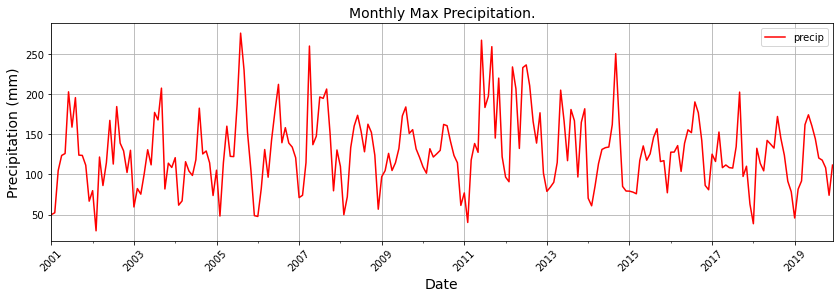

<Figure size 432x288 with 0 Axes>

In [39]:
df_precipitation.resample('M').max().plot(y='precip', kind='line',figsize=(14,4),c='red')
plt.title('Monthly Max Precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/monthly_max_precip.jpg");

# 2.6 - Identify patterns

2.6.1 - Temperature

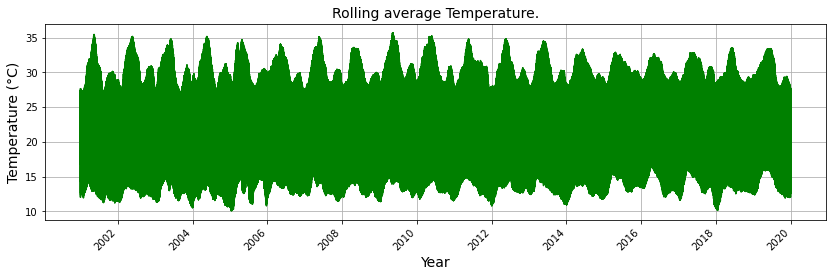

In [40]:
df_temperature['daily_avg_temp'].rolling(window=30).mean().plot(figsize=(14,4),c='green')
plt.title('Rolling average Temperature.',fontsize=14, loc = 'center')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()

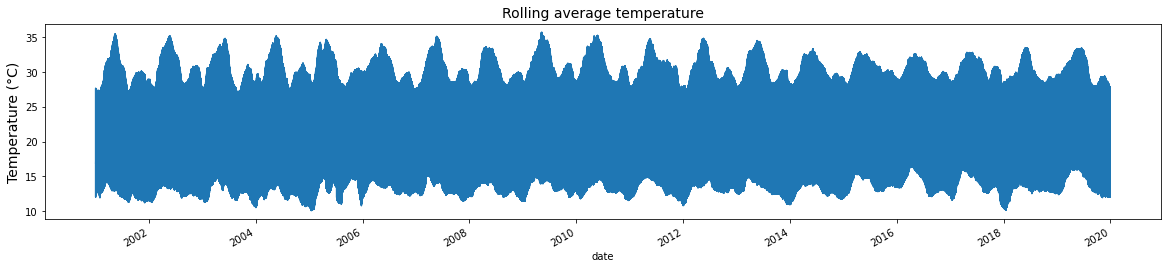

In [41]:
plt.figure(figsize=(20,4))
plt.title('Rolling average temperature',fontsize=14, loc = 'center')
df_temperature['daily_avg_temp'].rolling(window=30).mean().plot(kind='line')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.show()

2.6.2 - Precipitation

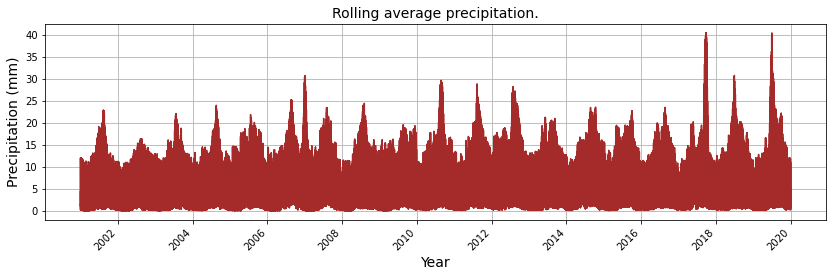

<Figure size 432x288 with 0 Axes>

In [42]:
df_precipitation['precip'].rolling(window=30).mean().plot(figsize=(14,4),c='brown')
plt.title('Rolling average precipitation.',fontsize=14, loc = 'center')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation = 45);
plt.grid();
plt.show()
plt.savefig("./images/rolling_avg_precip.jpg");

- An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths. A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

- Autocorrelation Function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient againist the lag, which is measured interms of a number of periods of units.

- ACF stands for Autocorrelation Function, and it is a measure of the correlation between a time series and its lagged values. In other words, the ACF measures how closely the values at time t are related to the values at time t-k, where k is the number of lags. The ACF can help identify patterns in the data such as seasonality and help determine the appropriate lag order for modeling the time series.

- The ACF plot shows the correlation between the time series and its lagged values, while the

- The PACF plot shows the partial correlation between the time series and its lagged values, after accounting for the intermediate lags. 

- The plots can be used to identify significant correlations and help choose appropriate modeling techniques for the time series.


###### 2.6.3 - Autocorrelation Function (ACF) and Partial ACF (ACF) - Temperature

With monthly average data

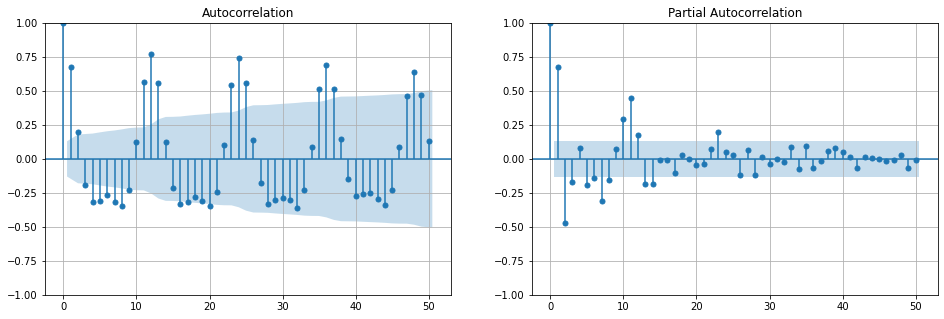

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_temperature_avg_monthly['daily_avg_temp'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_temperature_avg_monthly['daily_avg_temp'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_temp_monthly.jpg");

With weekly average data

In [44]:
df_temperature_avg_weekly = df_temperature.resample('W').mean()

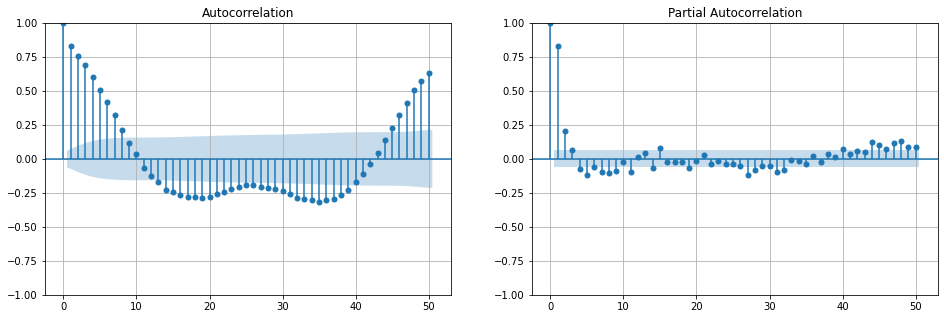

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_temperature_avg_weekly['daily_avg_temp'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_temperature_avg_weekly['daily_avg_temp'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_temp_monthly.jpg");

###### 2.6.4 - Autocorrelation Function (ACF) and Partial ACF (ACF) - Precipitation

Original series autocorrelation with monthly average data

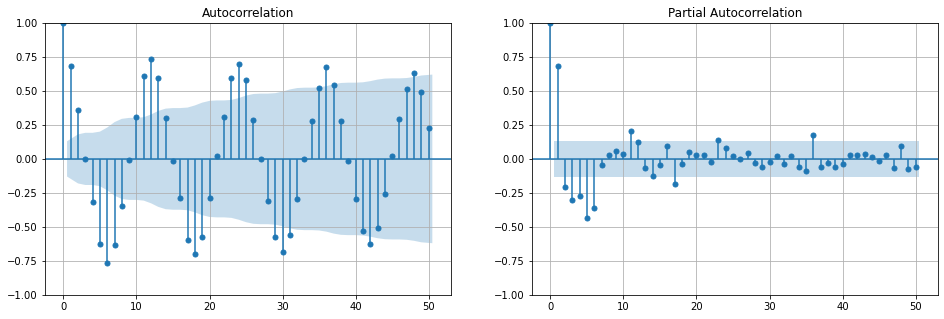

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_precipitation_avg_monthly['precip'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_precipitation_avg_monthly['precip'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_precip_monthly.jpg");

With weekly average

In [47]:
df_precipitation_avg_weekly = df_precipitation.resample('W').mean()

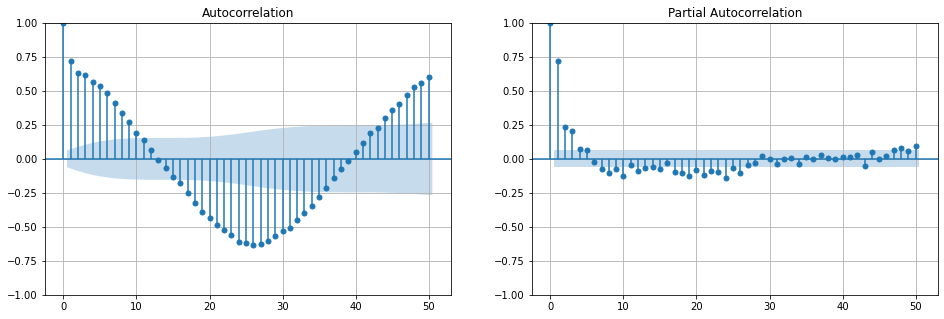

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(df_precipitation_avg_weekly['precip'], lags=50, ax = ax[0]);
ax[0].grid()
plot_pacf(df_precipitation_avg_weekly['precip'], lags=50, ax = ax[1], method = 'ywm');
ax[1].grid()
plt.savefig("./images/acf_precip_weekly.jpg");

# 2.7 - Stationarity

- A time series where its statistical properties, such as mean, variance, and autocovariance, are constant over time.

- Stationarity is an important assumption in many time series analysis methods, such as time series forecasting, as it allows for meaningful modeling of the underlying patterns and relationships in the data. When a time series is non-stationary, its statistical properties may change over time, making it more difficult to model and forecast.

- To determine whether a time series is stationary, various statistical tests can be performed, such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. If a time series is found to be non-stationary, it can be made stationary through techniques such as differencing, which involves subtracting consecutive values of the time series to remove trends, or by transforming the time series using log or square root transformations.

- In this task I will use ADF to check stationarity of my dataset.

- Typically, a significance level of 0.05 (5%) is used, which means that you accept a 5% chance of rejecting the null hypothesis when it is actually true. This level is commonly used in economics and finance, and it provides a good balance between the risk of Type I and Type II errors.


- However, in some cases, you may want to use a different significance level based on your specific needs. For example, if you require a high level of confidence in the results, you may choose a lower significance level, such as 0.01 (1%). Alternatively, if you are willing to accept a higher risk of a Type I error, you may choose a higher significance level, such as 0.10 (10%).

- However, in some **weather prediction** applications, a higher level of confidence may be required, especially if the consequences of an incorrect prediction are severe. In such cases, a lower significance level, such as 0.01 (1%), may be appropriate.

- It's important to note that the choice of significance level should be made based on the specific needs of the application and the consequences of incorrect predictions.


###### 2.7.1 - Stationarity - Temperature

In [49]:
result = adfuller(df_temperature_avg_monthly['daily_avg_temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.4034458214683827
p-value: 0.010841963180595719


In [50]:
ans = 'Stationay' if adfuller(df_temperature_avg_monthly['daily_avg_temp'])[1] < 0.01 else 'Non-Stationary'
print('Temperature time series data is:', ans)

Temperature time series data is: Non-Stationary


In this case, the p-value is greater than 0.05, so we need to make the data stationary by differencing:

So we have to use some techniques to make our temparatures data stationary.

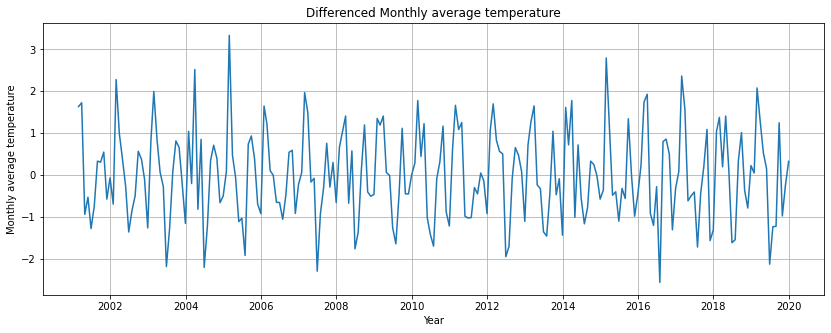

ADF Statistic: -6.068042710599898
p-value: 1.1688747704495531e-07
Temperature time series data is: Stationay


In [51]:
df_temperature_avg_monthly_diff = df_temperature_avg_monthly['daily_avg_temp'].diff().dropna()
plt.figure(figsize=(14, 5))
plt.plot(df_temperature_avg_monthly_diff)
plt.title('Differenced Monthly average temperature')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Monthly average temperature')
plt.show()

result = adfuller(df_temperature_avg_monthly_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ans = 'Stationay' if adfuller(df_temperature_avg_monthly_diff)[1] < 0.01 else 'Non-Stationary'
print('Temperature time series data is:', ans)

###### 2.7.2 - Stationarity - Precipitation

In [52]:
result = adfuller(df_precipitation_avg_monthly['precip'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.89980147669657
p-value: 0.00203630861439414


In [53]:
ans = 'Stationay' if adfuller(df_precipitation_avg_monthly['precip'])[1] < 0.01 else 'Non-Stationary'
print('Precipitation time series data is:', ans)

Precipitation time series data is: Stationay


# 2.8 - Decompose dataset

The dataset have negative vlaues for temprature so, I will use a decomposition method that is specifically designed for time series data with ***negative values***, such as the seasonal and trend decomposition using loess (STL) algorithm. This method is based on locally weighted regression, and it can effectively capture the underlying trend, seasonal, and residual components in a time series, even when negative values are present.

Decompose the temperature and precipitation into its constituent components.
- Trend: underlying long-term direction of the data.
- Seasonality: The repeating patterns that occur at regular intervals (daily, weekly, yearly)
- Cyclical: The fluctuatins in the data that occur due to economic or other external factors.



In [54]:
#decomposed time series data
res_temp = sm.tsa.seasonal_decompose(df_temperature_avg_monthly['daily_avg_temp'],model='additive', period=12)
# we can also access each component separately by accessing the result.trend, result.seasonal, and result.resid attributes.

<Figure size 1440x288 with 0 Axes>

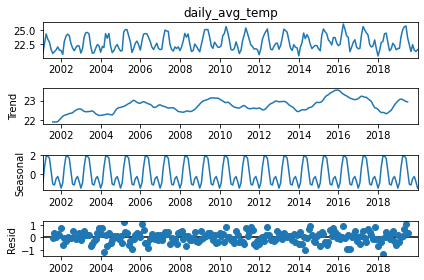

In [55]:
plt.figure(figsize=(20,4))
resplot = res_temp.plot()
plt.savefig("./images/decompose_temp.jpg");
plt.show()

In [56]:
res_precip = sm.tsa.seasonal_decompose(df_precipitation_avg_monthly['precip'],model='additive', period=12)

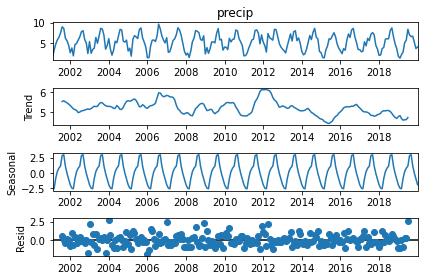

In [57]:
resplot = res_precip.plot()
plt.savefig("./images/decompose_precip.jpg");
plt.show()

**Residual:** Estimate the residual component by subtracting the trend and seasonal components from the original data. The residual represents the random or irregular fluctuations in the data that are not accounted for by the trend and seasonal components.

# 3 - Selecting an appropriate model. 

- ***Model selection***: There are various models to choose from, including autoregressive integrated moving average (ARIMA), seasonal ARIMA (SARIMA), and more advanced deep learning models such as recurrent neural networks (RNNs) or long short-term memory (LSTM) networks.

- ARIMA models are suitable for modeling time series data that are stationary (i.e., the mean and variance of the series are constant over time). ARIMA models can capture the autocorrelation present in the data by modeling the relationship between the current observation and the previous observations. The order of an ARIMA model is denoted as ARIMA(p,d,q), where p represents the number of autoregressive terms, d represents the number of nonseasonal differences, and q represents the number of moving average terms.

- SARIMA models, on the other hand, are suitable for modeling time series data that exhibit seasonal patterns (i.e., the data have a repeating pattern over time). SARIMA models can capture both the autocorrelation and the seasonality present in the data by modeling the relationship between the current observation and the previous observations at the same seasonal lag(s). The order of a SARIMA model is denoted as SARIMA(p,d,q)(P,D,Q)m, where P represents the number of seasonal autoregressive terms, D represents the number of seasonal differences, Q represents the number of seasonal moving average terms, and m represents the length of the seasonal cycle.

- One popular type of ANN for time series forecasting is the Recurrent Neural Network (RNN), which can capture both short-term and long-term dependencies in the data. RNNs have a "memory" that allows them to learn and model sequential data, which can be useful for time series forecasting tasks. In particular, the Long Short-Term Memory (LSTM)

- So, due to the seasonality nature of our data here we are going to use **SARIMA** and will model using recurrent neural netwroks from **RNN/LSTM** networks.

## 3.1 SARIMA - Fitting the model and evaluating its performance.

SARIMA models, are statistical models that are well-suited for time series data that exhibit seasonal patterns. SARIMA models are designed to capture the autocorrelation and seasonality in the data, and can be used to generate forecasts that incorporate both short-term fluctuations and long-term trends. SARIMA models are particularly useful for data with a clear, repeating seasonal pattern, such as monthly or quarterly data.

###### Grid search function for SARIMA hyperparameters

Grid searching for the optimal order and seasonality hyperparameters is a common technique used in time series analysis to determine the best model fit

In [58]:
def sarima_gridsearch(data):
    #train/test split
    train_size = int(len(precipitation_monthly) * 0.8)
    train_data = precipitation_monthly[:train_size]
    test_data = precipitation_monthly[train_size:]
    
    # Define the hyperparameter ranges for SARIMA models
    p = range(0, 4)
    d = range(0, 3)
    q = range(0, 4)
    P = range(0, 4)
    D = range(0, 3)
    Q = range(0, 2)
    s = 12  # seasonality of 12 months
    
    # Define the search space for hyperparameters
    search_space = {
        'order': [(i, j, k) for i in p for j in d for k in q],
        'seasonal_order': [(i, j, k, s) for i in P for j in D for k in Q]
    }

    # Perform a grid search over the hyperparameters
    best_params = None
    best_mse = np.inf
    for params in itertools.product(*search_space.values()):
        order, seasonal_order = params
        try:
            model = auto_arima(train_data, start_p=order[0], start_d=order[1], start_q=order[2], 
                           seasonal=True, m=s, start_P=seasonal_order[0], start_D=seasonal_order[1], 
                           start_Q=seasonal_order[2], max_order=None, max_seasonal_order=None, 
                           trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)
            preds = model.predict(n_periods=len(test_data))
            mse = mean_squared_error(test_data, preds)
            if mse < best_mse:
                best_params = params
                best_mse = mse
            
        except:
            pass
    print(f"params={best_params}, MSE={best_mse}")
    start_p=best_params[0][0]
    start_d=best_params[0][1]
    start_q=best_params[0][2]

    start_P=best_params[1][0]
    start_D=best_params[1][1]
    start_Q=best_params[1][2]
    
    return {'start_p':start_p,'MSE':best_mse,'start_d':start_d,'start_q':start_q,'m':s,'start_P':start_P,'start_D':start_D,'start_Q':start_Q}

### 3.1.1 - Precipitation Data

**A - With Monthly average precipitation data**

In [59]:
precipitation_monthly = df_precipitation_avg_monthly['precip']

Grid search for order and seasonality hyperparameters for Precipitation with lowest mean square error (MSE) 

In [60]:
#Warning: This gridsearch operation may take several hours depending on the compute power of your machine
sarima_best = sarima_gridsearch(precipitation_monthly)

print(sarima_best['MSE'],sarima_best['start_p'],sarima_best['start_d'],sarima_best['start_q'],sarima_best['m'],sarima_best['start_P'],
      sarima_best['start_D'],sarima_best['start_Q'])

params=((1, 0, 3), (1, 0, 0, 12)), MSE=0.6622823828214311
0.6622823828214311 1 0 3 12 1 0 0


In [61]:
print(f"Mean Square Error = {sarima_best['MSE']}")

Mean Square Error = 0.6622823828214311


Model fitting: which involves estimating the model parameters using the training data.

In [134]:
#Fit a SARIMA model to the data
precipitation_monthly_model = SARIMAX(precipitation_monthly, order=(1,0,3), seasonal_order=(1, 0, 0, 12))
results = precipitation_monthly_model.fit()

Make predictions for the next 12 months

In [135]:
forecast = results.predict(n_periods=12)

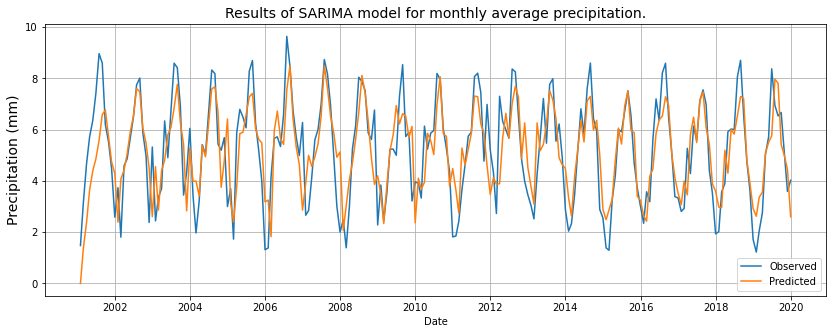

In [136]:
forecast_index = pd.date_range(start=precipitation_monthly.index[-1], periods=12, freq="MS")
#Plot the observed data and the predicted values
plt.figure(figsize=(14, 5))
plt.title('Results of SARIMA model for monthly average precipitation.',fontsize=14, loc = 'center')
plt.plot(precipitation_monthly, label="Observed")
plt.plot(forecast, label="Predicted")
#plt.fill_beftween(forecast_index, conf_int[:, 0], conf_int[:, 1], alpha=0.2)
plt.xlabel("Date")
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.grid();
plt.legend()
plt.savefig("./images/sarima_monthly_average_precip.jpg");
plt.show()

**B - With weekly average precipitation data**

In [66]:
precipitation_weekly = df_precipitation_avg_weekly['precip']

In [137]:
#Fit a SARIMA model to the data
precipitation_weekly_model = SARIMAX(precipitation_weekly, order=(1, 0, 3), seasonal_order=(1, 0, 0, 12))
results_precipitation_weekly = precipitation_weekly_model.fit()

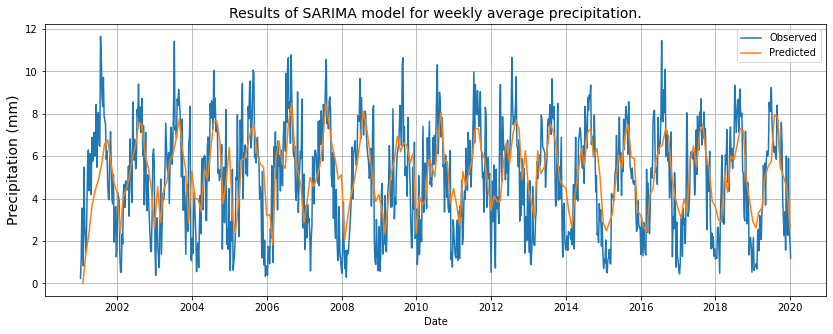

In [138]:
#Make predictions for the next 12 months
forecast_index = pd.date_range(start=precipitation_weekly.index[-1], periods=12, freq="MS")
#Plot the observed data and the predicted values
plt.figure(figsize=(14, 5))
plt.title('Results of SARIMA model for weekly average precipitation.',fontsize=14, loc = 'center')
plt.plot(precipitation_weekly, label="Observed")
plt.plot(forecast, label="Predicted")
plt.xlabel("Date")
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.grid();
plt.legend()
plt.savefig("./images/sarima_weekly_average_precip.jpg");
plt.show()

use the forecasting capabilities of the model, pass the number of steps to forecast in the future. Assign the forecast into the future to match up with y_future values as future_preds below.

There are ways to consider a seasonal oscillation within the data. For ARIMA, a version that adds in a seasonal element is called SARIMA. In statsmodels, we use the SARIMAX estimator to build this model that includes seasonal elements.

### 3.1.2 - Temperature Data

**A - With Monthly average temperature data**

In [71]:
temperature_monthly = df_temperature_avg_monthly['daily_avg_temp']
# take the differenced temp value
#temperature_monthly = df_temperature_avg_monthly_diff

Grid search for order and seasonality hyperparameters for Precipitation with lowest measn square error (MSE) 

In [72]:
sarima_best = sarima_gridsearch(temperature_monthly)

print(sarima_best['MSE'],sarima_best['start_p'],sarima_best['start_d'],sarima_best['start_q'],sarima_best['m'],sarima_best['start_P'],
      sarima_best['start_D'],sarima_best['start_Q'])

params=((1, 0, 3), (1, 0, 0, 12)), MSE=0.6622823828214311
0.6622823828214311 1 0 3 12 1 0 0


In [73]:
print(f"Mean Square Error = {sarima_best['MSE']}")

Mean Square Error = 0.6622823828214311


Root Mean Squared Error (RMSE): This is the square root of MSE and represents the typical difference between the actual and predicted values in the same units as the temperature or precipitation. Lower values of RMSE indicate better model performance.

In [74]:
rmse = np.sqrt(sarima_best['MSE'])

In [75]:
print(f"Root Mean Square Error = {rmse}")

Root Mean Square Error = 0.8138073376551916


In [139]:
#Fit a SARIMA model to the data
temperature_monthly_model = SARIMAX(temperature_monthly, order=(1, 0, 3), seasonal_order=(1, 0, 0, 12))
temperature_monthly_results = temperature_monthly_model.fit()

In [151]:
#Make predictions for the next 12 months
monthly_temperature_forecast = temperature_monthly_results.predict(n_periods=12)

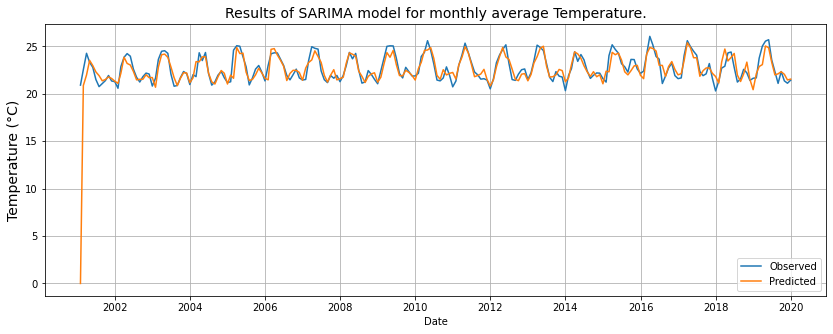

In [152]:
#Make predictions for the next 12 months
#Create a date range for the forecast period
forecast_index = pd.date_range(start=temperature_monthly.index[-1], periods=2, freq="MS")
#Plot the observed data and the predicted values
plt.figure(figsize=(14, 5))
plt.title('Results of SARIMA model for monthly average Temperature.',fontsize=14, loc = 'center')
plt.plot(temperature_monthly, label="Observed")
plt.plot(monthly_temperature_forecast, label="Predicted")
#plt.fill_beftween(forecast_index, conf_int[:, 0], conf_int[:, 1], alpha=0.2)
plt.xlabel("Date")
plt.ylabel('Temperature (°C)',fontsize=14)
plt.grid();
plt.legend()
plt.savefig("./images/sarima_monthly_average_temp.jpg");
plt.show()

**B - With weekly average temperature data**

In [79]:
temperature_weekly = df_temperature_avg_weekly['daily_avg_temp']

In [80]:
#Fit a SARIMA model to the data
temperature_weekly_model = SARIMAX(temperature_weekly, order=(1, 0, 3), seasonal_order=(1, 0, 0, 12))
temperature_weekly_results = temperature_weekly_model.fit()

In [81]:
#Make predictions for the next 12 months
weekly_temperature_forecast = temperature_weekly_results.predict(n_periods=12)

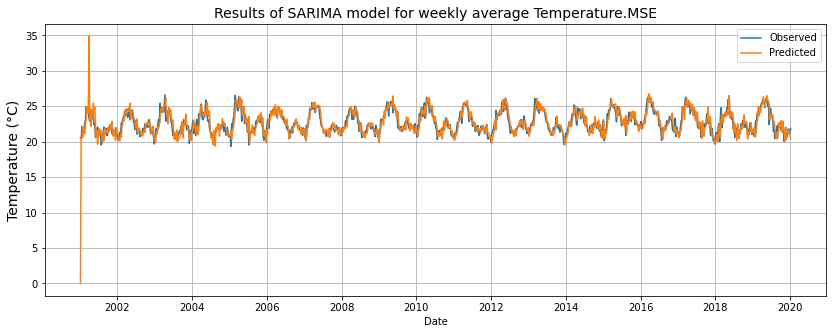

In [82]:
#Make predictions for the next 12 months
#Create a date range for the forecast period
forecast_index = pd.date_range(start=temperature_weekly.index[-1], periods=12, freq="MS")
#Plot the observed data and the predicted values
plt.figure(figsize=(14, 5))
plt.title('Results of SARIMA model for weekly average Temperature.MSE',fontsize=14, loc = 'center')
plt.plot(temperature_weekly, label="Observed")
plt.plot(weekly_temperature_forecast, label="Predicted")
#plt.fill_beftween(forecast_index, conf_int[:, 0], conf_int[:, 1], alpha=0.2)
plt.xlabel("Date")
plt.ylabel('Temperature (°C)',fontsize=14)
plt.grid();
plt.legend()
plt.savefig("./images/sarima_weekly_agerage_temp.jpg");
plt.show()

## 3.2 RNN/LSTM - Fitting the model and then evaluating its performance.

- ***LSTM*** (Long Short-Term Memory) in AI/ML. LSTM is a type of recurrent neural network (RNN) that is designed to overcome the problem of vanishing gradients, which occurs in traditional RNNs when they try to propagate error gradients back through many time steps.

- LSTMs use memory cells, input gates, forget gates, and output gates to control the flow of information through the network. The memory cells allow the network to retain information for long periods of time, while the gates control the flow of information in and out of the cells.

- LSTMs have proven to be very effective in tasks involving sequential data, such as speech recognition, natural language processing, and time series prediction.

Importing relevant libraries

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### 3.2.1 - Temperature Data

- **A - With monthly average temperature data**

Scaling the data using the MinMaxScaler function from scikit-learn

In [84]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(temperature_monthly.values.reshape(-1, 1))

Train/Test split where 3/4 th used for training and the rest for testing.

In [85]:
# Split data into training and testing sets
train_size = int(len(dataset) * 0.75)
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [86]:
# Create input-output pairs function
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
look_back = 12
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

Reshape the data for LSTM training
The LSTM model expects a 3D input of shape (batch_size, time_steps, features), where batch_size is the number of input sequences, time_steps is the number of time steps in each sequence, and features is the number of features at each time step.

In [88]:
# Reshape input data to be 3D (samples, time steps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

###### Build LSTM model using the Sequential function from Keras.

The model architecture includes two LSTM layers followed by two dense layers. 
The model is trained to minimize the mean squared error loss using the Adam optimizer, which is a popular gradient descent optimization algorithm.

I will be using the same LSTM model to predict the other datasets in this project.

In [89]:
# Build the LSTM model and compile
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50,return_sequences=False, input_shape=(look_back, 1)))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [90]:
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0)

In [91]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
# evaluate the model on the test data
mse = model.evaluate(testX, testY)

print("MSE:", mse)

2/2 [==============================] - 2s 9ms/step - loss: 0.0240
MSE: 0.023958178237080574


In [93]:
rmse = np.sqrt(mse)

In [94]:
print(f"Root Mean Square Error = {rmse}")

Root Mean Square Error = 0.15478429583481837


- Make predictions on the test data and visualize the results.

In [95]:
# Make predictions on testing data
testPredict = model.predict(testX)

2/2 [==============================] - 1s 13ms/step


In [96]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

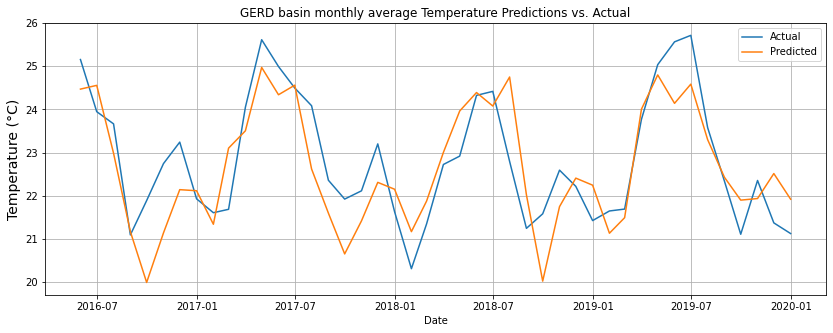

In [97]:
plt.figure(figsize=(14, 5))
plt.plot(temperature_monthly.index[train_size + look_back + 1:], testY.flatten(), label='Actual')
plt.plot(temperature_monthly.index[train_size + look_back + 1:], testPredict.flatten(), label='Predicted')
plt.title(f'GERD basin monthly average Temperature Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.grid()
plt.legend()
plt.savefig("./images/lstm_monthly_average_temp.jpg");
plt.show()

- **B - With weekly average temperature data, more granular than monthly average.**

Scaling the data using the MinMaxScaler function from scikit-learn

In [98]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(temperature_weekly.values.reshape(-1, 1))

Train/Test split where 3/4 th used for training and the rest for testing.

In [99]:
# Split data into training and testing sets
train_size = int(len(dataset) * 0.75)
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [100]:
look_back = 12
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

Reshape the data for LSTM training
The LSTM model expects a 3D input of shape (batch_size, time_steps, features), where batch_size is the number of input sequences, time_steps is the number of time steps in each sequence, and features is the number of features at each time step.

In [101]:
# Reshape input data to be 3D (samples, time steps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

- Using the same LSTM model to predict

In [102]:
# Build the LSTM model and compile
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50,return_sequences=False, input_shape=(look_back, 1)))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0)

In [104]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# evaluate the model on the test data
mse = model.evaluate(testX, testY)
print("MSE:", mse)

8/8 [==============================] - 2s 5ms/step - loss: 0.0301
MSE: 0.030088771134614944


In [106]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error = {rmse}")

Root Mean Square Error = 0.1734611516582746


In [107]:
# Make predictions on testing data
testPredict = model.predict(testX)

8/8 [==============================] - 1s 6ms/step


In [108]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

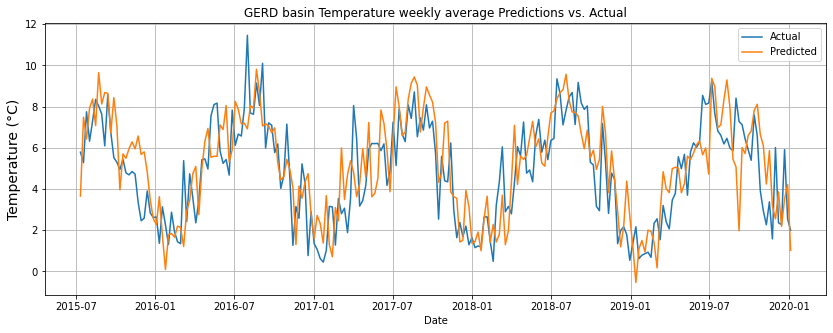

In [154]:
plt.figure(figsize=(14, 5))
plt.plot(temperature_weekly.index[train_size + look_back + 1:], testY.flatten(), label='Actual')
plt.plot(temperature_weekly.index[train_size + look_back + 1:], testPredict.flatten(), label='Predicted')
plt.title(f'GERD basin Temperature weekly average Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)',fontsize=14)
plt.grid()
plt.legend()
plt.savefig("./images/lstm_weekly_average_temp.jpg");
plt.show()

### 3.2.2 - Precipitation Data

- **A - With monthly average precipitation data**

Scaling the data using the MinMaxScaler function from scikit-learn

In [110]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(precipitation_monthly.values.reshape(-1, 1))

Train/Test split where 3/4 th used for training and the rest for testing.

In [111]:
# Split data into training and testing sets
train_size = int(len(dataset) * 0.75)
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [112]:
look_back = 12
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [113]:
# Reshape input data to be 3D (samples, time steps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [114]:
# Build the LSTM model and compile
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50,return_sequences=False, input_shape=(look_back, 1)))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [115]:
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0)

In [116]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
# evaluate the model on the test data
mse = model.evaluate(testX, testY)
print("MSE:", mse)

2/2 [==============================] - 2s 19ms/step - loss: 0.0165
MSE: 0.016515402123332024


In [118]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error = {rmse}")

Root Mean Square Error = 0.12851226448604827


In [119]:
# Make predictions on testing data
testPredict = model.predict(testX)

2/2 [==============================] - 1s 10ms/step


In [120]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

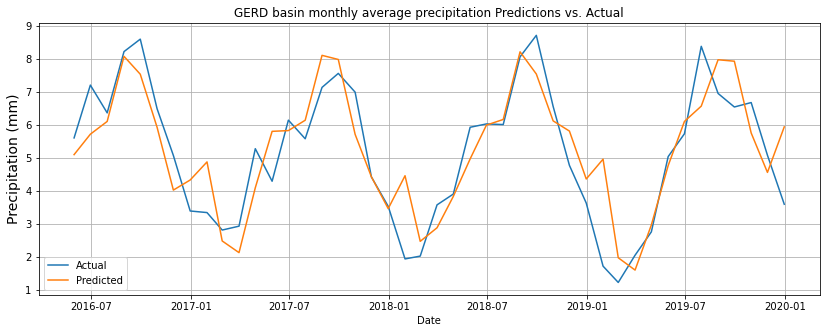

In [121]:
plt.figure(figsize=(14, 5))
plt.plot(precipitation_monthly.index[train_size + look_back + 1:], testY.flatten(), label='Actual')
plt.plot(precipitation_monthly.index[train_size + look_back + 1:], testPredict.flatten(), label='Predicted')
plt.title(f'GERD basin monthly average precipitation Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.grid()
plt.legend()
plt.savefig("./images/lstm_monthly_average_precipitation.jpg");
plt.show()

- **B - With weekly average precipitation data, more granular than monthly average.**

Scaling the data using the MinMaxScaler function from scikit-learn

In [122]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(precipitation_weekly.values.reshape(-1, 1))

Train/Test split where 3/4 th used for training and the rest for testing.

In [123]:
# Split data into training and testing sets
train_size = int(len(dataset) * 0.75)
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [124]:
look_back = 12
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [125]:
# Reshape input data to be 3D (samples, time steps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [126]:
# Build the LSTM model and compile
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50,return_sequences=False, input_shape=(look_back, 1)))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [127]:
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0)

In [128]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
# evaluate the model on the test data
mse = model.evaluate(testX, testY)
print("MSE:", mse)

8/8 [==============================] - 3s 6ms/step - loss: 0.0227
MSE: 0.022727426141500473


In [130]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error = {rmse}")

Root Mean Square Error = 0.15075618110545408


In [131]:
# Make predictions on testing data
testPredict = model.predict(testX)

8/8 [==============================] - 2s 7ms/step


In [132]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

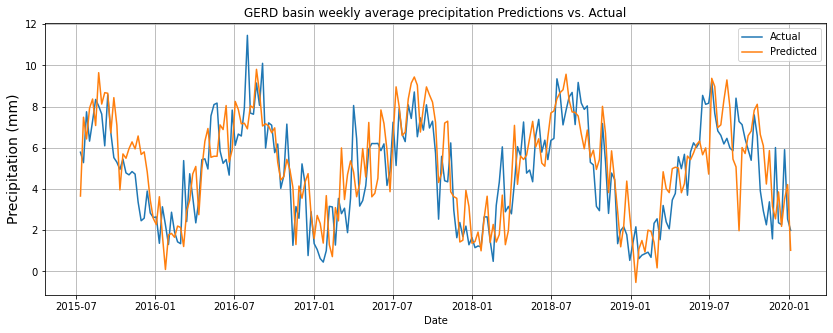

In [153]:
plt.figure(figsize=(14, 5))
plt.plot(precipitation_weekly.index[train_size + look_back + 1:], testY.flatten(), label='Actual')
plt.plot(precipitation_weekly.index[train_size + look_back + 1:], testPredict.flatten(), label='Predicted')
plt.title(f'GERD basin weekly average precipitation Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)',fontsize=14)
plt.grid()
plt.legend()
plt.savefig("./images/lstm_weekly_average_precip.jpg");
plt.show()

### Conclusion and Recommendation for future imporovement

We couldn't find more data about Dew Point, Humidity, wind speed, visiblity, pressure, etc which definetly help better imporve the quality of our model's prediction/forecast.

The other factor is due to lack of powerful computing machine my gridsearch only limited to only few parameters, using a powerful computer chan help span the search range and get hyperparameters that can deliver improved performance.

Predicting temperature and precipitation for GERD river basin have several benefits,such as: 

**Optimal water management:** Hydroelectric dams require a steady flow of water to generate electricity. Accurate predictions of temperature and precipitation can help dam operators manage water resources more efficiently by allowing them to make informed decisions about when to store water, release it, or generate electricity. This helps to maximize the efficiency of the **GERD** dam and reduce the risk of water shortages.

**Flood control:** Precipitation predictions can be used to anticipate and mitigate the effects of floods. By monitoring weather patterns and forecasting rainfall, **GERD** dam operators can adjust water release schedules to prevent the dam from being overwhelmed by excess water. This helps to prevent flooding downstream and reduce the risk of property damage and loss of life.

**Environmental management:** Temperature and precipitation predictions can help dam operators manage the environmental impacts of their operations. For example, accurate temperature predictions can help operators control water temperatures to maintain healthy aquatic ecosystems. Similarly, precipitation predictions can help operators manage water quality by adjusting water release schedules to prevent sedimentation and erosion.

**Financial planning:** Predicting temperature and precipitation can also help dam operators plan for future energy demand/shortage and price fluctuations. By forecasting weather patterns and water availability, **GERD** operators can adjust their operations and pricing strategies to maximize revenue and reduce costs.

##### Recommendation:

These analysis and prediction for the GERD basin can be further improved by takeing the following measures and resoureces.
    
- High-Quality Data: Accurate and timely data is crucial for a weather forecasting model. We have only data from 2000 to 2019 from University of Guelph which only have temperature and precipitation but adding Dew Point, Humidity, wind speed, visiblity, pressure will definetly further imporve the model's performance

- Machine Learning Algorithms: Due to factors related to experience and time, we havent explored more ML algorithms.Choosing the right machine learning algorithm can make a significant difference in forecasting accuracy. Different algorithms have different strengths and weaknesses, and selecting the best algorithm for a particular dataset can improve the model's performance.

- Ensemble Techniques: Ensemble techniques involve combining multiple models to improve the accuracy of the final forecast. These techniques can include using multiple algorithms, training models on different subsets of data, and combining the forecasts of multiple models.

- Continuous Learning: Weather patterns can change quickly, so it's important to update the model with new data regularly but on the current analysis we have data only until 2019. A model that can continuously learn from new data can adapt to changing weather patterns and improve its accuracy over time.

- Domain Expertise: Incorporating domain expertise into the model can help to improve the accuracy of the forecast and the ability to read and analyse data from the presepective of its impart on the GERD hydroelectric econsystem. 